<a href="https://colab.research.google.com/github/mits1923/IDS/blob/main/MACHINELEARNING_U2R2L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import sys
import sklearn
import itertools
import random
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

# Avoid Printing Warnings

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
col_names = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell'
,'su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate'
,'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','last_flag'])

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Copy of KDDTrain+_20Percent.txt', header=None,names=col_names)
#df_test = pd.read_csv('/content/drive/MyDrive/Dataset/Copy of KDDTest+.txt', header=None,names=col_names)

In [ ]:
#data_train=df.append(df_test)
data_train=df


In [ ]:
data_train.shape

(25192, 43)

In [ ]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

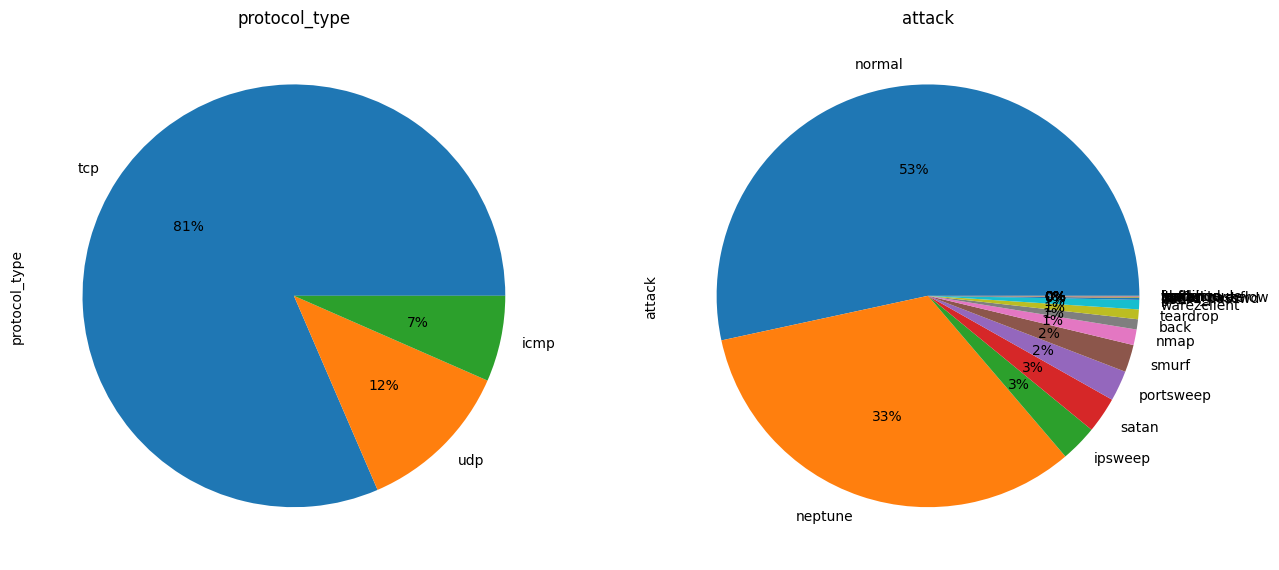

In [ ]:
pie_plot(data_train, ['protocol_type', 'attack'], 1, 2)

In [ ]:
data_train["Attack_type"]=np.where(data_train.attack=="normal",0,1)

In [ ]:
def Attack_class(x):
    if(x in DOS):
        return  3#"DOS"
    elif(x in Probe):
        return 4 #"PROBE"
    elif(x in R2L):
        return 1 #"R2L"
    elif(x in U2R):
        return 2 #"U2R"
    else:
        return 0 #"normal"

In [ ]:
DOS=["back","land","neptune","pod","smurf","teardrop","apache2","udpstorm","processtable","worm"]
Probe=["satan","ipsweep","nmap","portsweep","mscan","saint"]
R2L=["guess_passwd","ftp_write","imap","phf","multihop","warezmaster","warezclient","spy","xlock","xsnoop","snmpguess","snmpgetattack","httptunnel","sendmail","named"]
U2R=["buffer_overflow","loadmodule","rootkit","perl","sqlattack","xterm","ps"]

In [ ]:
data_train.shape

(25192, 44)

In [ ]:
data_train.attack.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy'], dtype=object)

In [ ]:
data_train["Attack_class"]=data_train.attack.apply(Attack_class)
data_train.drop("attack", inplace=True, axis=1)
data_train.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,Attack_type,Attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.00,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.00,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.00,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1,3
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.20,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.00,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0,0
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.00,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,21,1,3
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.00,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,21,1,3
7,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.00,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,21,1,3
8,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.00,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,21,1,3
9,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.00,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,21,1,3


In [ ]:
data_train.Attack_class.unique()


array([0, 3, 1, 4, 2])

In [ ]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,Attack_type,Attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1,3
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0,0


In [ ]:
dataframe=data_train

In [ ]:
dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])

In [ ]:
dataframe.shape

(25192, 121)

In [ ]:
dataframe.Attack_class.unique()

array([0, 3, 1, 4, 2])

In [ ]:
train=dataframe

In [ ]:
nor=pd.DataFrame(columns=dataframe.columns)
k=train[train['Attack_class']==0]
nor=nor.append(k)

In [ ]:
nor.shape

(13449, 121)

In [ ]:
nor

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,Attack_type,Attack_class,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.00,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.00,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.20,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.00,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12,0,287,2251,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,7,0.0,0.00,0.0,0.0,1.00,0.00,0.43,8,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25176,0,748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,58,27,0.12,0.07,0.12,0.07,0.00,0.00,0.00,0.00,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
25177,0,29

In [ ]:
dataframe.columns

NameError: ignored

In [ ]:
key=pd.DataFrame(columns=dataframe.columns)
k=train[train['Attack_class']==1]
key=key.append(k)
k=train[train['Attack_class']==2]
key=key.append(k)

In [ ]:
key.Attack_class.unique()

array([1, 2], dtype=object)

In [ ]:
key.shape

(220, 121)

In [ ]:
tot=key.append(nor)

In [ ]:
duplicate = nor[nor.duplicated()]

In [ ]:
duplicate

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,Attack_type,Attack_class,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH


In [ ]:
nor["num_compromised"].unique()

array([0, 3, 2, 19, 5, 1, 4, 107, 462, 110, 6, 151, 7, 31, 9, 157, 13,
       558, 12, 371, 217, 83, 193, 789, 520, 884, 457], dtype=object)

In [ ]:
u2r=pd.DataFrame(columns=dataframe.columns)
k=train[train['Attack_class']==2]
u2r=u2r.append(k)
r2l=pd.DataFrame(columns=dataframe.columns)
k=train[train['Attack_class']==1]
r2l=r2l.append(k)

In [ ]:
k=u2r

In [ ]:
for i in range(20):
  u2r=u2r.append(k)

In [ ]:
r2l.shape

(209, 121)

In [ ]:
test=u2r.append(r2l)

In [ ]:
u2r.shape

(231, 121)

In [ ]:
acc=[]
acct=[]

In [ ]:
dt.Attack_class.unique()

array([2, 1, 0], dtype=object)

In [ ]:
dt.shape

(670, 121)

In [ ]:
key=test
dt=key.append(nor.iloc[100:330])
scaled_train=dt
x = scaled_train.drop(['Attack_class'] , axis = 1).values
y = scaled_train['Attack_class'].values
y_reg = scaled_train['Attack_class'].values

pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)


y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)

In [ ]:
for i in range(21):
  #RANDOMFOREST
  rfp = RandomForestClassifier().fit(x_train_reduced,y_train_reduced)
  t=metrics.accuracy_score(y_test_reduced, rfp.predict(x_test_reduced))*100
  tt=metrics.accuracy_score(y_train_reduced, rfp.predict(x_train_reduced))*100
  acc.append(t)
  acct.append(tt)



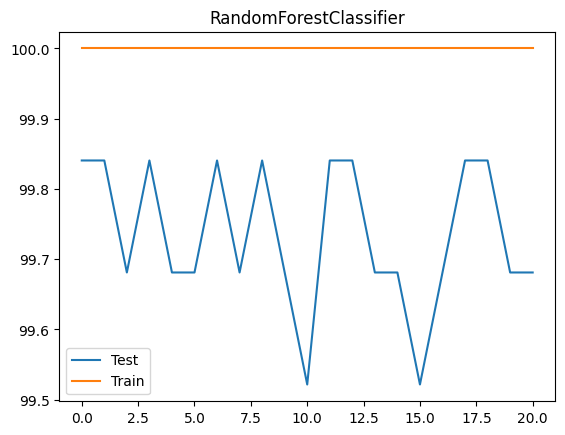

In [ ]:
plt.plot(acc,label='Test')
plt.plot(acct,label='Train')
plt.title("RandomForestClassifier")
plt.legend()

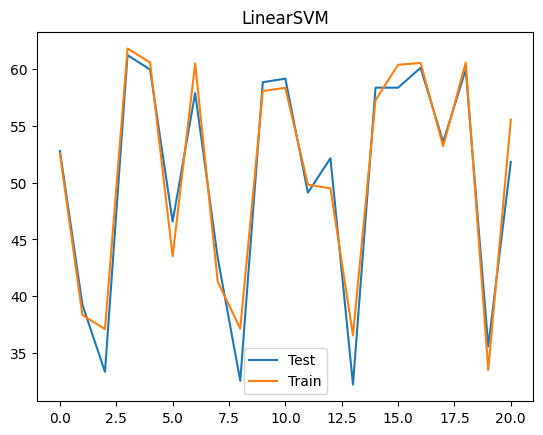

In [ ]:
acc=[]
acct=[]
for i in range(21):
   #LinearSVM
  lin_svcp = svm.LinearSVC().fit(x_train_reduced, y_train_reduced)
  t=metrics.accuracy_score(y_test_reduced, lin_svcp.predict(x_test_reduced))*100
  tt=metrics.accuracy_score(y_train_reduced, lin_svcp.predict(x_train_reduced))*100
  acc.append(t)
  acct.append(tt)
plt.plot(acc,label='Test')
plt.plot(acct,label='Train')
plt.title("LinearSVM")
plt.legend()


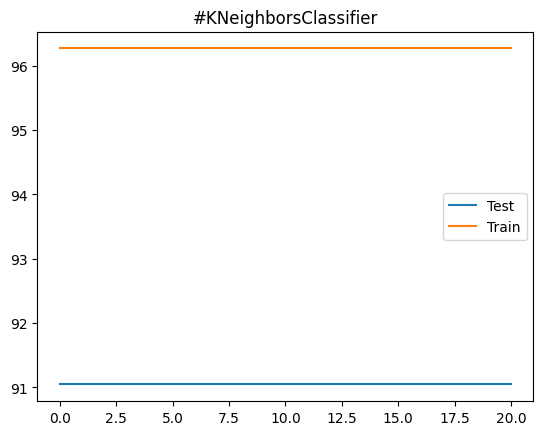

In [ ]:
acc=[]
acct=[]
for i in range(21):
  #KNeighborsClassifier



  clf_KNNp=KNeighborsClassifier()
  clf_KNNp.fit(x_train_reduced, y_train_reduced.astype(int))
  t=metrics.accuracy_score(y_test_reduced, clf_KNNp.predict(x_test_reduced))*100
  tt=metrics.accuracy_score(y_train_reduced, clf_KNNp.predict(x_train_reduced))*100

  acc.append(t)
  acct.append(tt)
plt.plot(acc,label='Test')
plt.plot(acct,label='Train')
plt.title("#KNeighborsClassifier")
plt.legend()


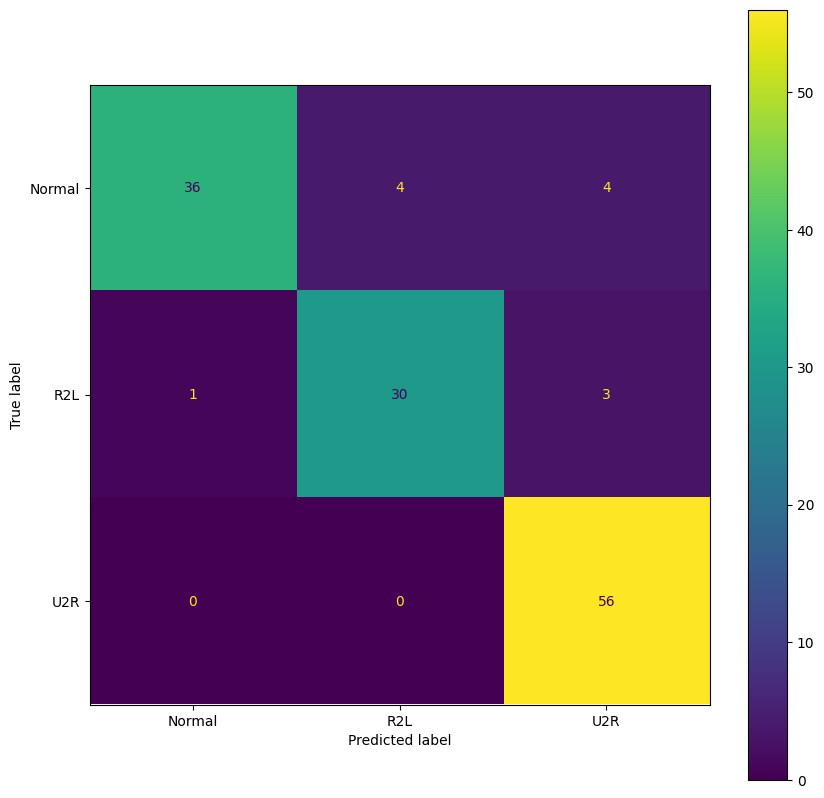

In [ ]:
actual = y_test_reduced
predicted = clf_KNNp.predict(x_test_reduced)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
ccm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [ 'Normal','R2L','U2R'])


fig, ax = plt.subplots(figsize=(10,10))
ax.grid(False)
ccm_display.plot(ax=ax)

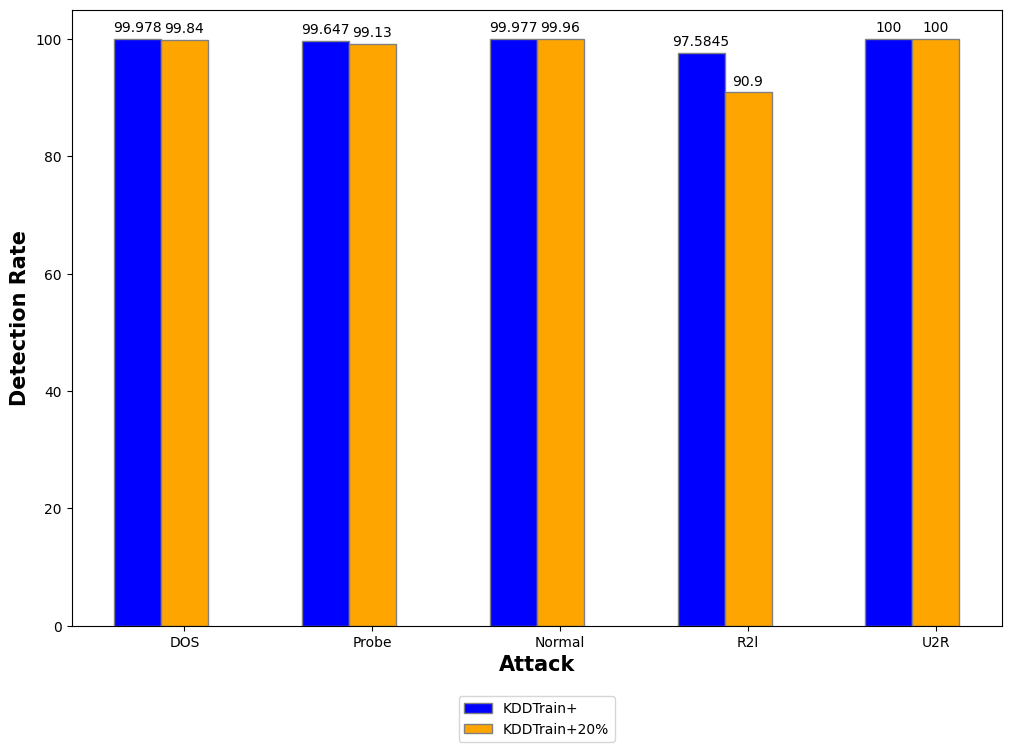

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
tt = [99.978,99.647,99.977,97.5845,100]
t20 = [99.84,99.13,99.96,90.900,100]


# Set position of bar on X axis
br1 = np.arange(len(tt))
br2 = [x + barWidth for x in br1]

# Make the plot
k=plt.bar(br1, tt, color ='b', width = barWidth,
        edgecolor ='grey', label ='KDDTrain+')
plt.bar_label(k,padding=3)
k=plt.bar(br2, t20, color ='orange', width = barWidth,
        edgecolor ='grey', label ='KDDTrain+20%')
plt.bar_label(k,padding=3)

 # Adding Xticks
plt.xlabel('Attack', fontweight ='bold', fontsize = 15)
plt.ylabel('Detection Rate', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(tt))],
        ['DOS','Probe','Normal','R2l','U2R'])


plt.legend()
plt.legend(bbox_to_anchor =(0.5,-0.20), loc='lower center')
plt.show()

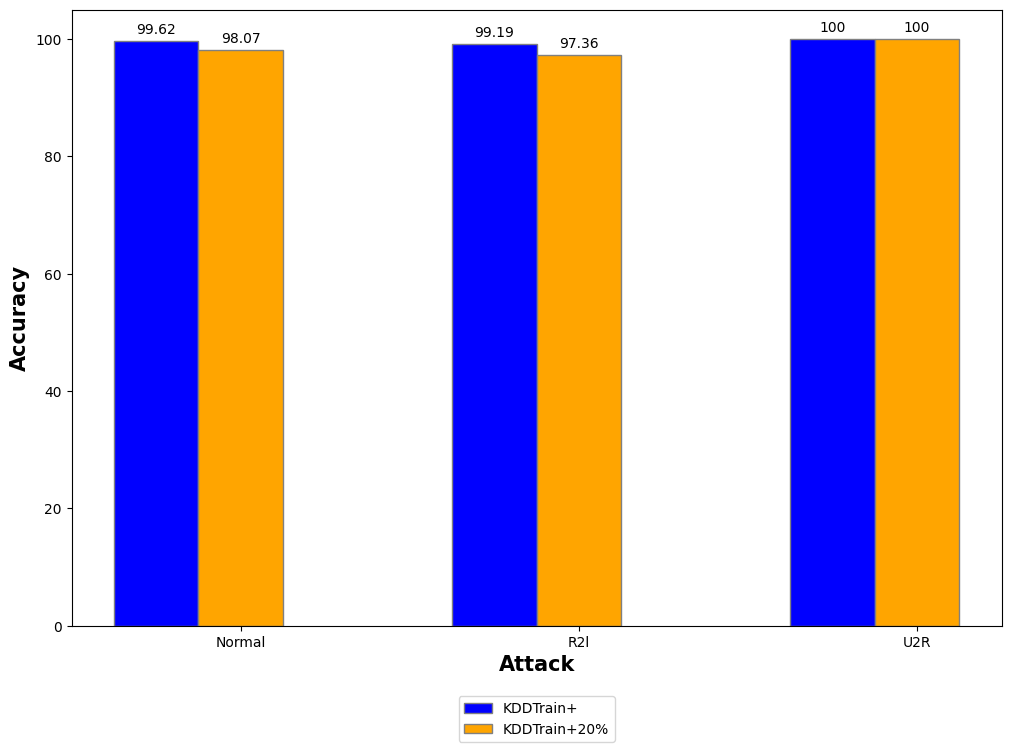

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
tt = [99.62,99.19,100]
t20 = [98.07,97.36,100]


# Set position of bar on X axis
br1 = np.arange(len(tt))
br2 = [x + barWidth for x in br1]

# Make the plot
k=plt.bar(br1, tt, color ='b', width = barWidth,
        edgecolor ='grey', label ='KDDTrain+')
plt.bar_label(k,padding=3)
k=plt.bar(br2, t20, color ='orange', width = barWidth,
        edgecolor ='grey', label ='KDDTrain+20%')
plt.bar_label(k,padding=3)

 # Adding Xticks
plt.xlabel('Attack', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(tt))],
        ['Normal','R2l','U2R'])


plt.legend()
plt.legend(bbox_to_anchor =(0.5,-0.20), loc='lower center')
plt.show()

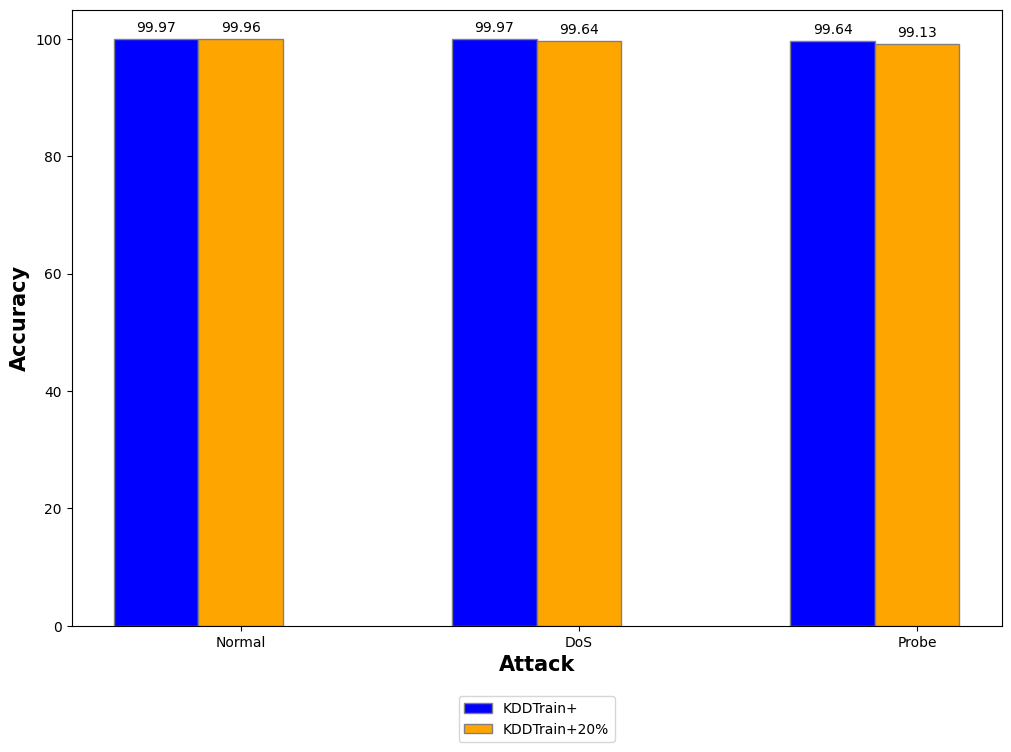

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
tt = [99.97,99.97,99.64]
t20 = [99.96,99.64,99.13]


# Set position of bar on X axis
br1 = np.arange(len(tt))
br2 = [x + barWidth for x in br1]

# Make the plot
k=plt.bar(br1, tt, color ='b', width = barWidth,
        edgecolor ='grey', label ='KDDTrain+')
plt.bar_label(k,padding=3)
k=plt.bar(br2, t20, color ='orange', width = barWidth,
        edgecolor ='grey', label ='KDDTrain+20%')
plt.bar_label(k,padding=3)

 # Adding Xticks
plt.xlabel('Attack', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(tt))],
        ['Normal','DoS','Probe'])


plt.legend()
plt.legend(bbox_to_anchor =(0.5,-0.20), loc='lower center')
plt.show()

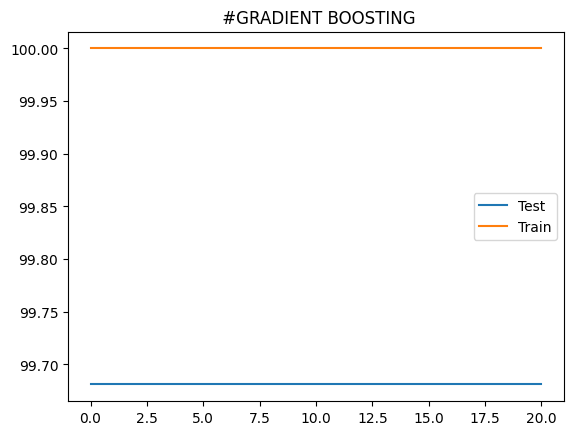

In [ ]:
acc=[]
acct=[]
for i in range(21):
  #GRADIENT BOOSTING

  gb_modp = GradientBoostingClassifier(n_estimators=200, random_state= 10)
  gb_modp.fit(x_train_reduced, y_train_reduced)
  t=metrics.accuracy_score(y_test_reduced, gb_modp.predict(x_test_reduced))*100
  tt=metrics.accuracy_score(y_train_reduced, gb_modp.predict(x_train_reduced))*100

  acc.append(t)
  acct.append(tt)
plt.plot(acc,label='Test')
plt.plot(acct,label='Train')
plt.title(" #GRADIENT BOOSTING")
plt.legend()


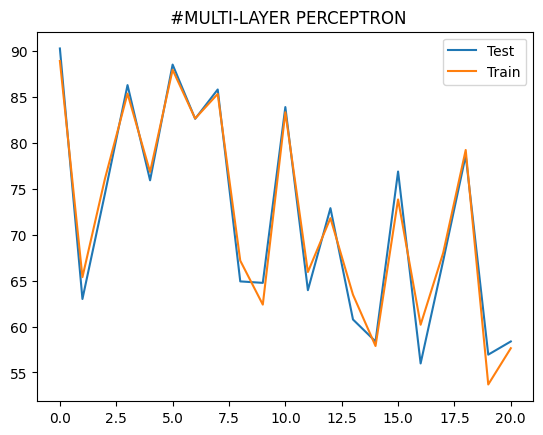

In [ ]:
acc=[]
acct=[]
for i in range(21):
    #MULTI-LAYER PERCEPTRON


  mlp_modp = MLPClassifier(hidden_layer_sizes=[100,50])
  mlp_modp.fit(x_train_reduced, y_train_reduced)
  t=metrics.accuracy_score(y_test_reduced, mlp_modp.predict(x_test_reduced))*100
  tt=metrics.accuracy_score(y_train_reduced, mlp_modp.predict(x_train_reduced))*100

  acc.append(t)
  acct.append(tt)
plt.plot(acc,label='Test')
plt.plot(acct,label='Train')
plt.title(" #MULTI-LAYER PERCEPTRON")
plt.legend()


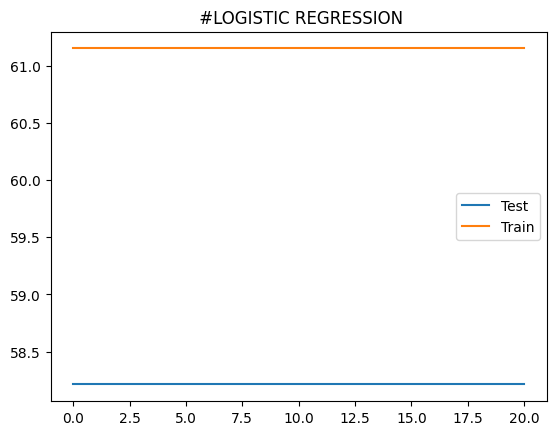

In [ ]:
acc=[]
acct=[]
for i in range(21):
  #LOGISTIC REGRESSION



  lg_modp = LogisticRegression()
  lg_modp.fit(x_train_reduced, y_train_reduced)
  t=metrics.accuracy_score(y_test_reduced, lg_modp.predict(x_test_reduced))*100
  tt=metrics.accuracy_score(y_train_reduced, lg_modp.predict(x_train_reduced))*100


  acc.append(t)
  acct.append(tt)
plt.plot(acc,label='Test')
plt.plot(acct,label='Train')
plt.title(" #LOGISTIC REGRESSION")
plt.legend()


In [ ]:
key1=test

In [ ]:
arf=[]
for i in range(0,67345,1047):
  key=key1
  dt=key.append(nor.iloc[i:i+1047])
  scaled_train=dt
  x = scaled_train.drop(['Attack_class'] , axis = 1).values
  y = scaled_train['Attack_class'].values
  y_reg = scaled_train['Attack_class'].values

  pca = PCA(n_components=20)
  pca = pca.fit(x)
  x_reduced = pca.transform(x)


  y = y.astype('int')
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)


  #RANDOMFOREST
  rfp = RandomForestClassifier().fit(x_train_reduced,y_train_reduced)
  t=metrics.accuracy_score(y_test_reduced, rfp.predict(x_test_reduced))
  arf.append(t)



In [ ]:
arf

In [ ]:
asv=[]
for i in range(0,67345,1047):
  key=key1
  dt=key.append(nor.iloc[i:i+1047])
  scaled_train=dt
  x = scaled_train.drop(['Attack_class'] , axis = 1).values
  y = scaled_train['Attack_class'].values
  y_reg = scaled_train['Attack_class'].values

  pca = PCA(n_components=20)
  pca = pca.fit(x)
  x_reduced = pca.transform(x)


  y = y.astype('int')
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)


  #LinearSVM


  lin_svcp = svm.LinearSVC().fit(x_train_reduced, y_train_reduced)
  t=metrics.accuracy_score(y_test_reduced, lin_svcp.predict(x_test_reduced))

  asv.append(t)



In [ ]:
akn=[]
for i in range(0,67345,1047):
  key=key1
  dt=key.append(nor.iloc[i:i+1047])
  scaled_train=dt
  x = scaled_train.drop(['Attack_class'] , axis = 1).values
  y = scaled_train['Attack_class'].values
  y_reg = scaled_train['Attack_class'].values

  pca = PCA(n_components=20)
  pca = pca.fit(x)
  x_reduced = pca.transform(x)


  y = y.astype('int')
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)


  #KNeighborsClassifier



  clf_KNNp=KNeighborsClassifier()
  clf_KNNp.fit(x_train_reduced, y_train_reduced.astype(int))
  t=metrics.accuracy_score(y_test_reduced, clf_KNNp.predict(x_test_reduced))

  akn.append(t)



In [ ]:
agb=[]
for i in range(0,67345,1047):
  key=key1
  dt=key.append(nor.iloc[i:i+1047])
  scaled_train=dt
  x = scaled_train.drop(['Attack_class'] , axis = 1).values
  y = scaled_train['Attack_class'].values
  y_reg = scaled_train['Attack_class'].values

  pca = PCA(n_components=20)
  pca = pca.fit(x)
  x_reduced = pca.transform(x)


  y = y.astype('int')
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)


  #GRADIENT BOOSTING




  gb_modp = GradientBoostingClassifier(n_estimators=200, random_state= 10)
  gb_modp.fit(x_train_reduced, y_train_reduced)
  t=metrics.accuracy_score(y_test_reduced, gb_modp.predict(x_test_reduced))

  agb.append(t)



In [ ]:
amp=[]
for i in range(0,67345,1047):
  key=key1
  dt=key.append(nor.iloc[i:i+1047])
  scaled_train=dt
  x = scaled_train.drop(['Attack_class'] , axis = 1).values
  y = scaled_train['Attack_class'].values
  y_reg = scaled_train['Attack_class'].values

  pca = PCA(n_components=20)
  pca = pca.fit(x)
  x_reduced = pca.transform(x)


  y = y.astype('int')
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)


  #MULTI-LAYER PERCEPTRON


  mlp_modp = MLPClassifier(hidden_layer_sizes=[100,50])
  mlp_modp.fit(x_train_reduced, y_train_reduced)
  t=metrics.accuracy_score(y_test_reduced, mlp_modp.predict(x_test_reduced))

  amp.append(t)



In [ ]:
alr=[]
for i in range(0,67345,1047):
  key=key1
  dt=key.append(nor.iloc[i:i+1047])
  scaled_train=dt
  x = scaled_train.drop(['Attack_class'] , axis = 1).values
  y = scaled_train['Attack_class'].values
  y_reg = scaled_train['Attack_class'].values

  pca = PCA(n_components=20)
  pca = pca.fit(x)
  x_reduced = pca.transform(x)


  y = y.astype('int')
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)


  #LOGISTIC REGRESSION



  lg_modp = LogisticRegression()
  lg_modp.fit(x_train_reduced, y_train_reduced)
  t=metrics.accuracy_score(y_test_reduced, lg_modp.predict(x_test_reduced))

  alr.append(t)



In [ ]:
arf=[i*100 for i in arf]

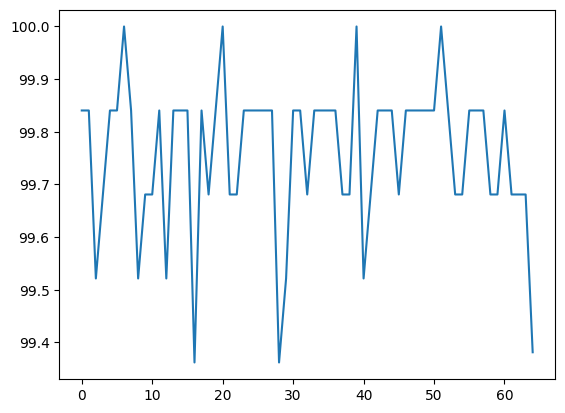

In [ ]:
  #RANDOMFOREST

plt.plot(arf)

In [ ]:
asv=[i*100 for i in asv]

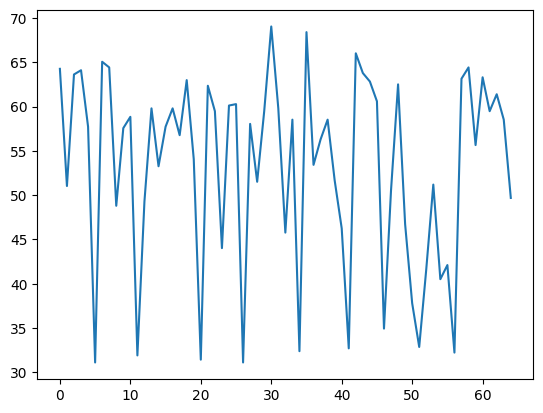

In [ ]:
  #LinearSVM

plt.plot(asv)

In [ ]:
akn=[i*100 for i in akn]

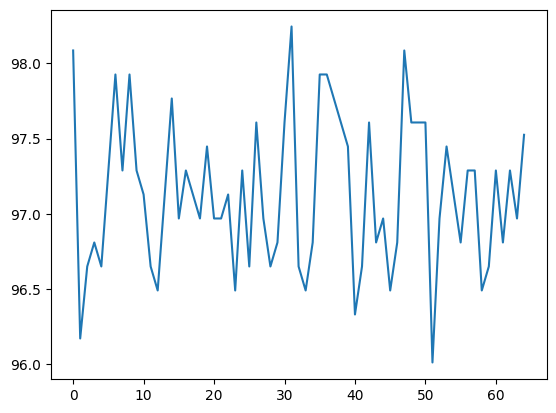

In [ ]:
  #KNeighborsClassifier

plt.plot(akn)

In [ ]:
agb=[i*100 for i in agb]

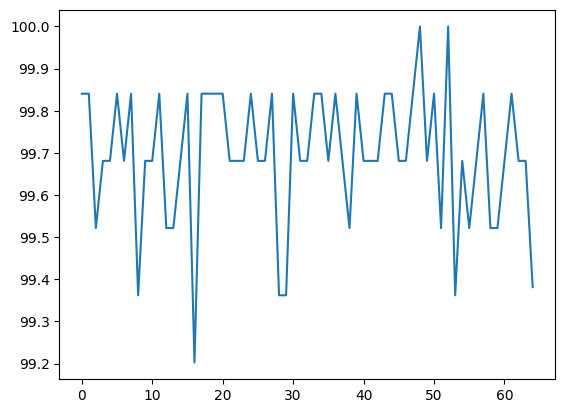

In [ ]:
  #GRADIENT BOOSTING

plt.plot(agb)

In [ ]:
amp=[i*100 for i in amp]

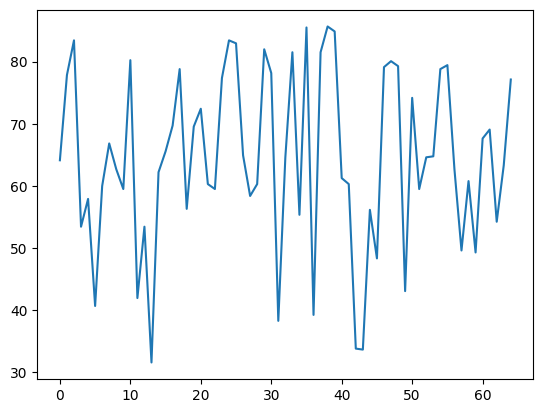

In [ ]:
plt.plot(amp)
  #MULTI-LAYER PERCEPTRON


In [ ]:
alr=[i*100 for i in alr]

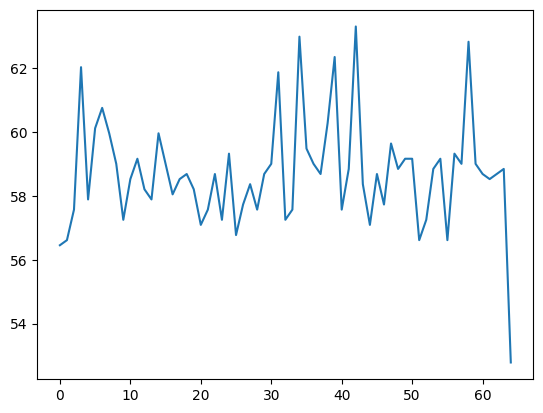

In [ ]:
plt.plot(alr)
  #LOGISTIC REGRESSION


In [ ]:
#Shallow Neural Network
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout

In [ ]:
shallow_modelp = Sequential([
    Dense(1024, input_dim=20, activation='relu'),
    Dropout(0.01),
    Dense(3, activation='softmax')
])

In [ ]:
asn=[]
for i in range(0,67345,1047):
  key=key1
  dt=key.append(nor.iloc[i:i+1047])
  scaled_train=dt
  x = scaled_train.drop(['Attack_class'] , axis = 1).values
  y = scaled_train['Attack_class'].values
  y_reg = scaled_train['Attack_class'].values

  pca = PCA(n_components=20)
  pca = pca.fit(x)
  x_reduced = pca.transform(x)


  y = y.astype('int')
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)




  shallow_modelp.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  shallow_modelp.fit(x_train_reduced, y_train_reduced, epochs=10, batch_size=32)
  t=metrics.accuracy_score(y_test_reduced, np.argmax(shallow_modelp.predict(x_test_reduced), axis=1))*100

  asn.append(t)



Epoch 1/10
79/79 [==============================] - 1s 3ms/step - loss: 1517.6272 - accuracy: 0.4236
Epoch 2/10
79/79 [==============================] - 0s 4ms/step - loss: 992.1072 - accuracy: 0.4659
Epoch 3/10
79/79 [==============================] - 0s 5ms/step - loss: 914.7826 - accuracy: 0.5592
Epoch 4/10
79/79 [==============================] - 0s 4ms/step - loss: 731.2395 - accuracy: 0.6023
Epoch 5/10
79/79 [==============================] - 0s 5ms/step - loss: 929.5635 - accuracy: 0.6410
Epoch 6/10
79/79 [==============================] - 0s 5ms/step - loss: 1068.2350 - accuracy: 0.6211
Epoch 7/10
79/79 [==============================] - 0s 5ms/step - loss: 1057.0536 - accuracy: 0.6526
Epoch 8/10
79/79 [==============================] - 0s 5ms/step - loss: 708.1077 - accuracy: 0.6609
Epoch 9/10
79/79 [==============================] - 0s 4ms/step - loss: 546.6299 - accuracy: 0.7088
Epoch 10/10
20/20 [==============================] - 0s 2ms/step
Epoch 1/10
79/79 [==============

In [ ]:
#Deep Neural Network
deep_modelp = Sequential([
    Dense(1024, input_dim=20, activation='relu'),
    Dropout(0.01),
    Dense(768, activation='relu'),
    Dropout(0.01),
    Dense(512, activation='relu'),
    Dropout(0.01),
    Dense(256, activation='relu'),
    Dropout(0.01),
    Dense(128, activation='relu'),
    Dropout(0.01),
    Dense(5, activation='softmax')
])

In [ ]:
adn=[]
for i in range(0,67345,1047):
  key=key1
  dt=key.append(nor.iloc[i:i+1047])
  scaled_train=dt
  x = scaled_train.drop(['Attack_class'] , axis = 1).values
  y = scaled_train['Attack_class'].values
  y_reg = scaled_train['Attack_class'].values

  pca = PCA(n_components=20)
  pca = pca.fit(x)
  x_reduced = pca.transform(x)


  y = y.astype('int')
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)




  deep_modelp.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  deep_modelp.fit(x_train_reduced, y_train_reduced, epochs=10, batch_size=32)
  t=metrics.accuracy_score(y_test_reduced, np.argmax(deep_modelp.predict(x_test_reduced), axis=1))*100

  adn.append(t)



Epoch 1/10
79/79 [==============================] - 3s 24ms/step - loss: 1814.2902 - accuracy: 0.3562
Epoch 2/10
79/79 [==============================] - 2s 24ms/step - loss: 1352.9138 - accuracy: 0.3865
Epoch 3/10
79/79 [==============================] - 2s 28ms/step - loss: 207.6818 - accuracy: 0.3893
Epoch 4/10
79/79 [==============================] - 3s 36ms/step - loss: 453.7019 - accuracy: 0.3929
Epoch 5/10
79/79 [==============================] - 2s 27ms/step - loss: 111.9106 - accuracy: 0.3917
Epoch 6/10
79/79 [==============================] - 2s 24ms/step - loss: 42.5893 - accuracy: 0.4045
Epoch 7/10
79/79 [==============================] - 2s 24ms/step - loss: 35.3165 - accuracy: 0.4192
Epoch 8/10
79/79 [==============================] - 2s 24ms/step - loss: 8.4673 - accuracy: 0.4240
Epoch 9/10
79/79 [==============================] - 2s 24ms/step - loss: 16.2007 - accuracy: 0.4479
Epoch 10/10
20/20 [==============================] - 0s 6ms/step
Epoch 1/10
79/79 [===========

In [ ]:
#Convolutional Neural Network
cnn_modelp = Sequential([
    Conv1D(64, 3, padding="same", activation="relu", input_shape=(20,1)),
    MaxPooling1D(pool_size=(2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(5, activation="softmax")
])

In [ ]:
acn=[]
for i in range(0,67345,1047):
  key=key1
  dt=key.append(nor.iloc[i:i+1047])
  scaled_train=dt
  x = scaled_train.drop(['Attack_class'] , axis = 1).values
  y = scaled_train['Attack_class'].values
  y_reg = scaled_train['Attack_class'].values

  pca = PCA(n_components=20)
  pca = pca.fit(x)
  x_reduced = pca.transform(x)


  y = y.astype('int')
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)




  cnn_modelp.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  cnn_modelp.fit(x_train_reduced.reshape((-1,20,1)), y_train_reduced, epochs=10, batch_size=32)
  t=metrics.accuracy_score(y_test_reduced, np.argmax(cnn_modelp.predict(x_test_reduced), axis=1))*100


  acn.append(t)



Epoch 1/10
79/79 [==============================] - 2s 5ms/step - loss: 2369.6614 - accuracy: 0.3410
Epoch 2/10
79/79 [==============================] - 0s 5ms/step - loss: 523.8405 - accuracy: 0.3458
Epoch 3/10
79/79 [==============================] - 0s 4ms/step - loss: 303.1275 - accuracy: 0.3726
Epoch 4/10
79/79 [==============================] - 0s 5ms/step - loss: 355.5915 - accuracy: 0.3578
Epoch 5/10
79/79 [==============================] - 0s 5ms/step - loss: 186.6733 - accuracy: 0.3570
Epoch 6/10
79/79 [==============================] - 0s 4ms/step - loss: 147.9777 - accuracy: 0.3686
Epoch 7/10
79/79 [==============================] - 0s 4ms/step - loss: 119.3458 - accuracy: 0.3682
Epoch 8/10
79/79 [==============================] - 0s 4ms/step - loss: 85.9707 - accuracy: 0.3702
Epoch 9/10
79/79 [==============================] - 0s 4ms/step - loss: 33.1706 - accuracy: 0.3706
Epoch 10/10
20/20 [==============================] - 0s 2ms/step
Epoch 1/10
79/79 [==================

In [ ]:
#Artificial Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def fun():
    model = Sequential()
    #here 30 is output dimension
    model.add(Dense(20,input_dim =20,activation = 'relu',kernel_initializer='random_uniform'))
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(3,activation='softmax'))
    #loss is categorical_crossentropy which specifies that we have multiple classes
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

    return model

In [ ]:
aan=[]
for i in range(0,67345,1047):
  key=key1
  dt=key.append(nor.iloc[i:i+1047])
  scaled_train=dt
  x = scaled_train.drop(['Attack_class'] , axis = 1).values
  y = scaled_train['Attack_class'].values
  y_reg = scaled_train['Attack_class'].values

  pca = PCA(n_components=20)
  pca = pca.fit(x)
  x_reduced = pca.transform(x)


  y = y.astype('int')
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)


  #Artificial Neural Network




  modelp = KerasClassifier(build_fn=fun,epochs=30,batch_size=64)
  modelp.fit(x_train_reduced, y_train_reduced)
  metrics.accuracy_score(y_test_reduced,modelp.predict(x_test_reduced))*100


  aan.append(t)



Epoch 1/30
40/40 [==============================] - 1s 2ms/step - loss: 1.1094 - accuracy: 0.3434
Epoch 2/30
40/40 [==============================] - 0s 2ms/step - loss: 1.1079 - accuracy: 0.3478
Epoch 3/30
40/40 [==============================] - 0s 2ms/step - loss: 1.1065 - accuracy: 0.3478
Epoch 4/30
40/40 [==============================] - 0s 2ms/step - loss: 1.1052 - accuracy: 0.3478
Epoch 5/30
40/40 [==============================] - 0s 2ms/step - loss: 1.1040 - accuracy: 0.3478
Epoch 6/30
40/40 [==============================] - 0s 2ms/step - loss: 1.1027 - accuracy: 0.3478
Epoch 7/30
40/40 [==============================] - 0s 2ms/step - loss: 1.1015 - accuracy: 0.3478
Epoch 8/30
40/40 [==============================] - 0s 2ms/step - loss: 1.1004 - accuracy: 0.3478
Epoch 9/30
40/40 [==============================] - 0s 2ms/step - loss: 1.0993 - accuracy: 0.3478
Epoch 10/30
40/40 [==============================] - 0s 2ms/step - loss: 1.0982 - accuracy: 0.3478
Epoch 11/30
40/40 [

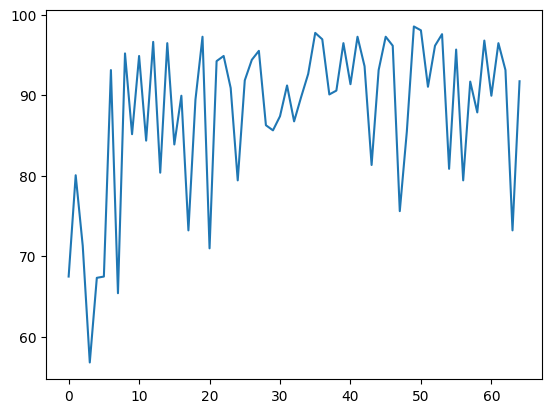

In [ ]:
plt.plot(asn)

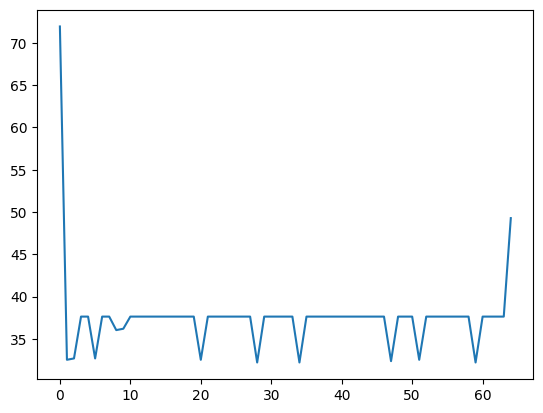

In [ ]:
plt.plot(adn)

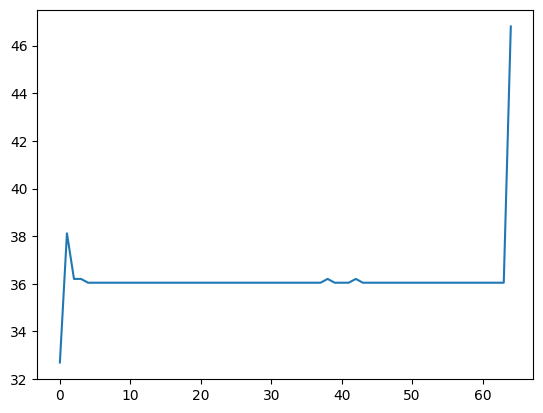

In [ ]:
plt.plot(acn)

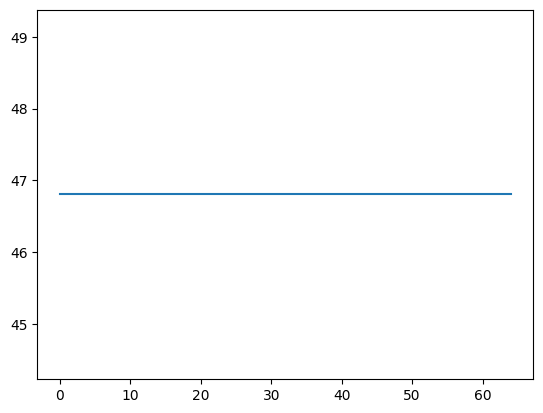

In [ ]:
plt.plot(aan)

In [ ]:
u=key.append(nor.head(1047))
m1=key.append(nor.iloc[5000:6048])
m2=key.append(nor.iloc[33771:34718])
l=key.append(nor.tail(1047))

In [ ]:
key.shape
l.shape

(2094, 125)

In [ ]:
scaled_train=u

In [ ]:
u.Attack_class.unique()


array([3, 4, 0], dtype=object)

In [ ]:
x = scaled_train.drop(['Attack_class'] , axis = 1).values
y = scaled_train['Attack_class'].values
y_reg = scaled_train['Attack_class'].values

pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))

y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)


Number of original features is 124 and of reduced features is 20


In [ ]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train),average='macro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test),average='macro')

    train_recall = metrics.recall_score(y_train, model.predict(X_train),average='macro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test),average='macro')

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))

    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    ccm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['R2L', 'U2R','Normal'])


    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    ccm_display.plot(ax=ax)

In [ ]:
import time

Training Accuracy RANDOMFOREST 100.0  Test Accuracy RANDOMFOREST 98.80668257756562
Training Precesion RANDOMFOREST 100.0  Test Precesion RANDOMFOREST 99.19718309859155
Training Recall RANDOMFOREST 100.0  Test Recall RANDOMFOREST 88.55555555555556


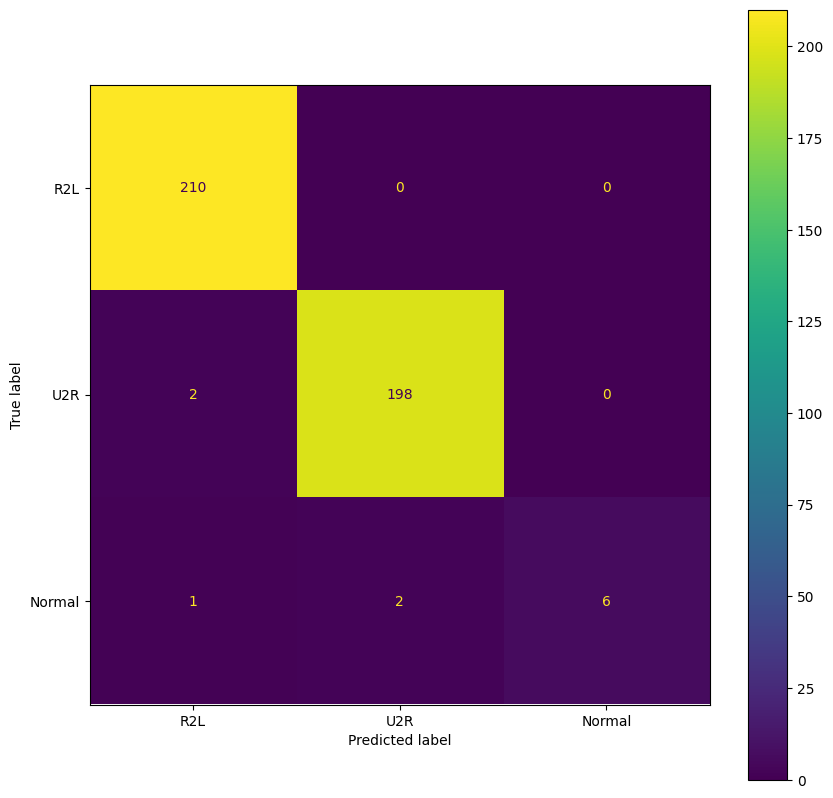

In [ ]:
#RANDOMFOREST
rfp = RandomForestClassifier().fit(x_train_reduced,y_train_reduced)
evaluate_classification(rfp, "RANDOMFOREST", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Training Accuracy RANDOMFOREST 100.0  Test Accuracy RANDOMFOREST 99.28400954653938
Training Precesion RANDOMFOREST 100.0  Test Precesion RANDOMFOREST 95.5016583747927
Training Recall RANDOMFOREST 100.0  Test Recall RANDOMFOREST 92.42592592592592


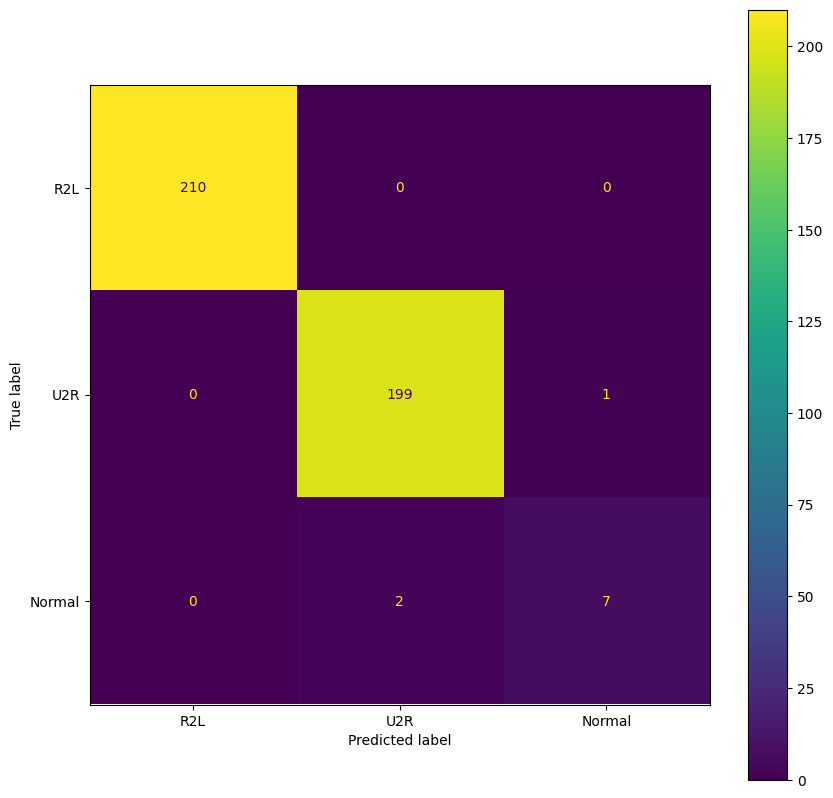

In [ ]:
rf = RandomForestClassifier().fit(x_train,y_train)
evaluate_classification(rf, "RANDOMFOREST", x_train, x_test, y_train, y_test)

Training Accuracy LinearSVM 86.26865671641791  Test Accuracy LinearSVM 86.39618138424821
Training Precesion LinearSVM 92.36365731001182  Test Precesion LinearSVM 81.56862745098039
Training Recall LinearSVM 62.152494797354116  Test Recall LinearSVM 66.12962962962963


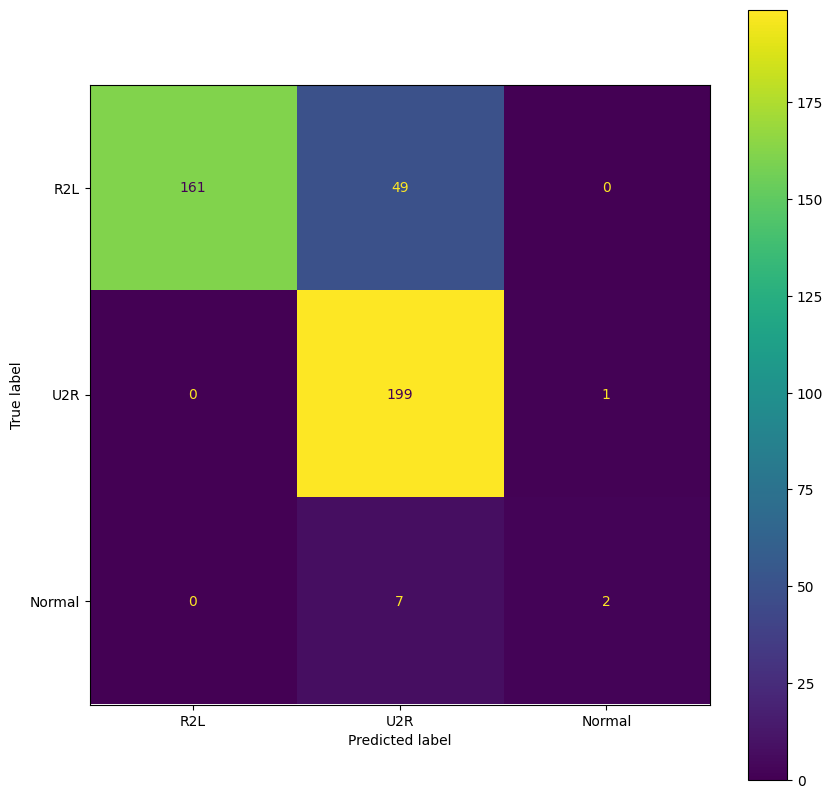

In [ ]:
#LinearSVM
lin_svc = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(lin_svc, "LinearSVM", x_train, x_test, y_train, y_test)

Training Accuracy LinearSVMT 75.88059701492537  Test Accuracy LinearSVMT 76.84964200477327
Training Precesion LinearSVMT 53.175425464141526  Test Precesion LinearSVMT 53.53096179183135
Training Recall LinearSVMT 51.951188356138644  Test Recall LinearSVMT 52.3968253968254


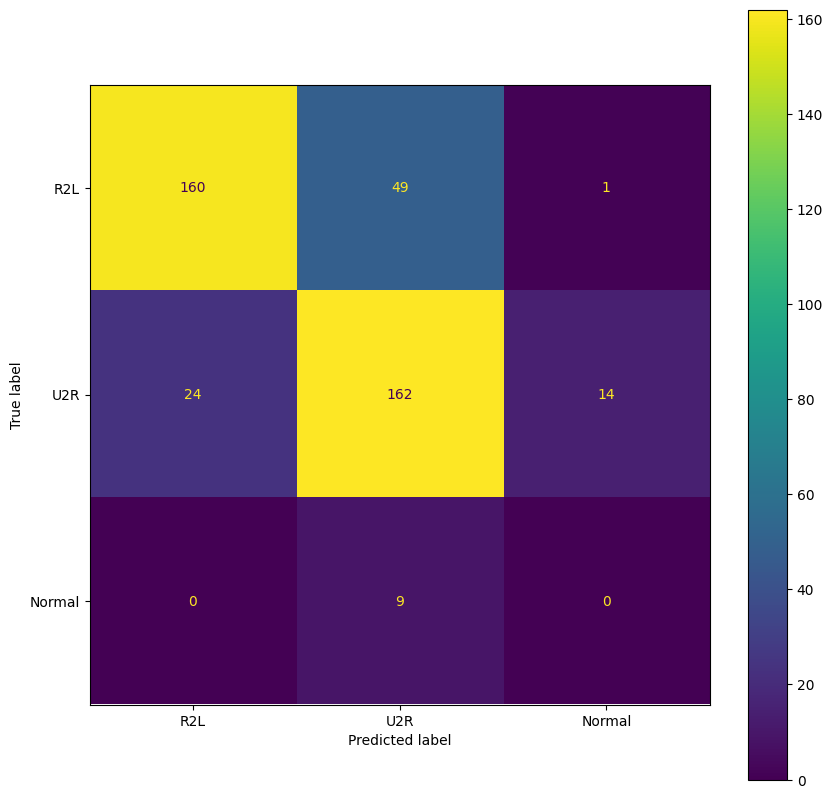

In [ ]:
lin_svcp = svm.LinearSVC().fit(x_train_reduced, y_train_reduced)
evaluate_classification(lin_svcp, "LinearSVMT", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)


Training Accuracy KNeighborsClassifier 96.4776119402985  Test Accuracy KNeighborsClassifier 95.94272076372316
Training Precesion KNeighborsClassifier 95.15249920205532  Test Precesion KNeighborsClassifier 91.86097427476739
Training Recall KNeighborsClassifier 83.63835193599239  Test Recall KNeighborsClassifier 83.08201058201058


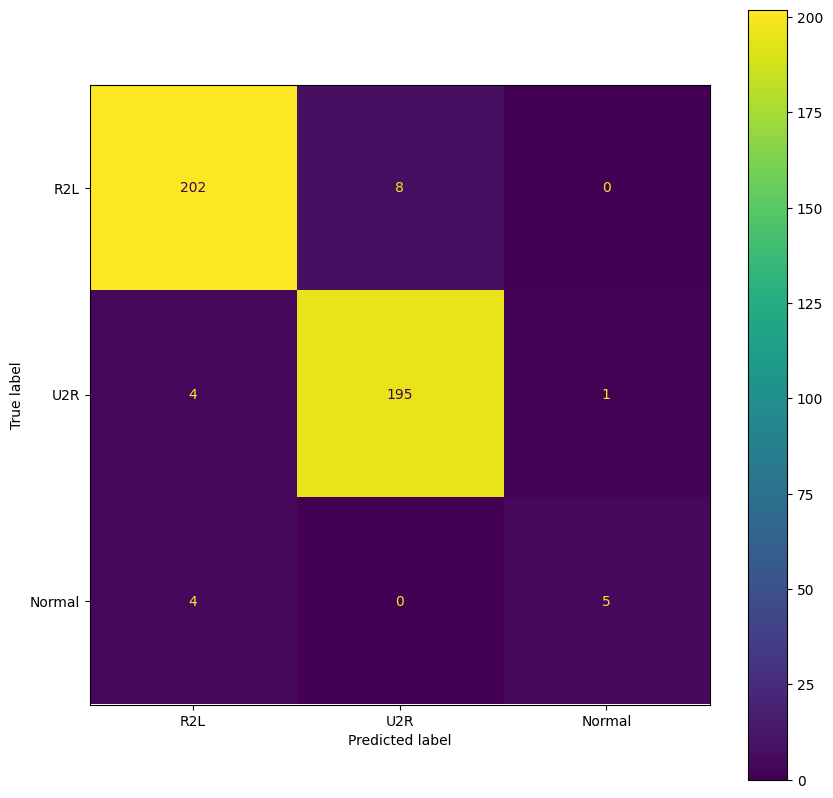

In [ ]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
clf_KNN=KNeighborsClassifier()
clf_KNN.fit(x_train, y_train.astype(int))
evaluate_classification(clf_KNN, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

Training Accuracy KNeighborsClassifierT 96.4776119402985  Test Accuracy KNeighborsClassifierT 95.94272076372316
Training Precesion KNeighborsClassifierT 95.15249920205532  Test Precesion KNeighborsClassifierT 91.86097427476739
Training Recall KNeighborsClassifierT 83.63835193599239  Test Recall KNeighborsClassifierT 83.08201058201058


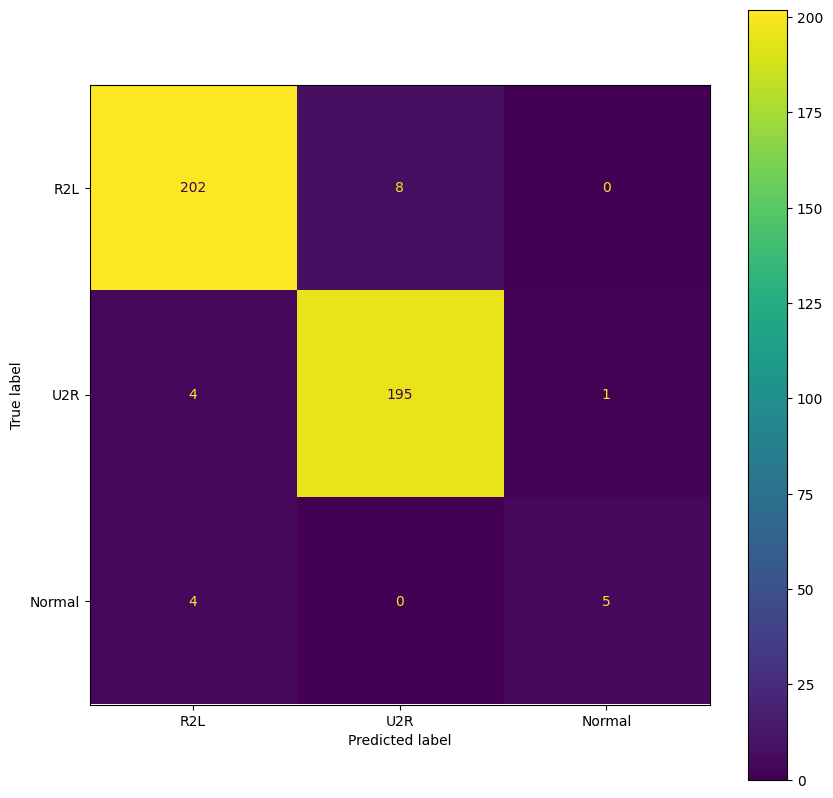

In [ ]:

clf_KNNp=KNeighborsClassifier()
clf_KNNp.fit(x_train_reduced, y_train_reduced.astype(int))
evaluate_classification(clf_KNNp, "KNeighborsClassifierT", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Training Accuracy GRADIENT BOOSTING 100.0  Test Accuracy GRADIENT BOOSTING 99.76133651551312
Training Precesion GRADIENT BOOSTING 100.0  Test Precesion GRADIENT BOOSTING 99.83416252072969
Training Recall GRADIENT BOOSTING 100.0  Test Recall GRADIENT BOOSTING 96.29629629629629


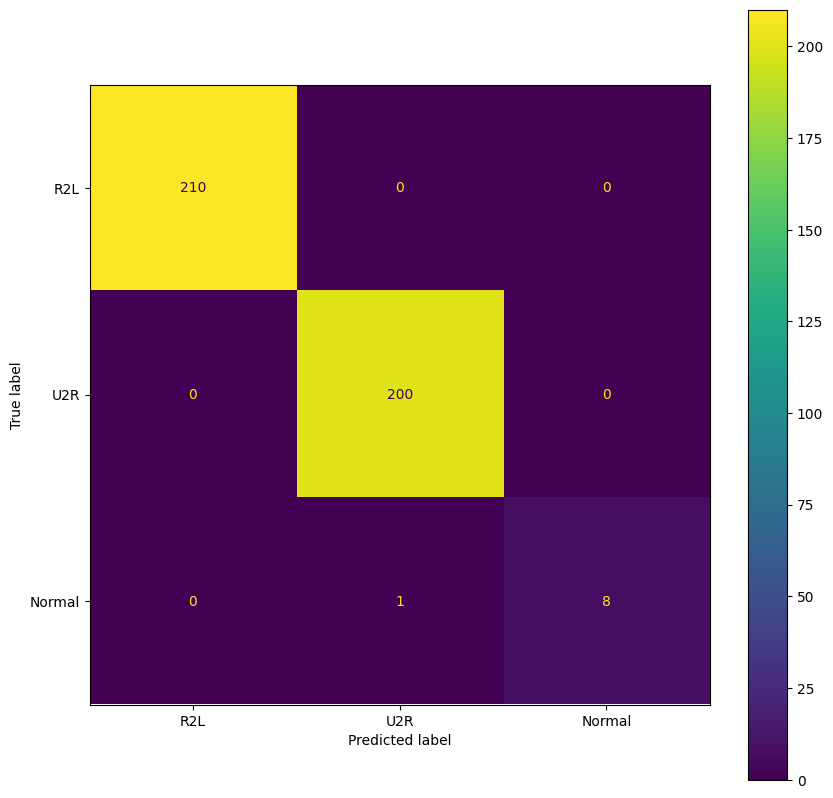

In [ ]:
#GRADIENT BOOSTING
gb_mod = GradientBoostingClassifier(n_estimators=200, random_state= 10)
gb_mod.fit(x_train, y_train)
evaluate_classification(gb_mod, "GRADIENT BOOSTING", x_train, x_test, y_train, y_test)


In [ ]:
gb_modp = GradientBoostingClassifier(n_estimators=200, random_state= 10)
gb_modp.fit(x_train_reduced, y_train_reduced)
metrics.accuracy_score(y_test_reduced, gb_modp.predict(x_test_reduced))

0.9928400954653938

In [ ]:
#MULTI-LAYER PERCEPTRON
mlp_mod = MLPClassifier(hidden_layer_sizes=[100,50])
mlp_mod.fit(x_train, y_train)
metrics.accuracy_score(y_test, mlp_mod.predict(x_test))

0.8735083532219571

Training Accuracy MULTI-LAYER PERCEPTRON 51.64179104477612  Test Accuracy MULTI-LAYER PERCEPTRON 50.59665871121718
Training Precesion MULTI-LAYER PERCEPTRON 47.33304656414668  Test Precesion MULTI-LAYER PERCEPTRON 37.621654501216554
Training Recall MULTI-LAYER PERCEPTRON 34.51364937670476  Test Recall MULTI-LAYER PERCEPTRON 33.69047619047619


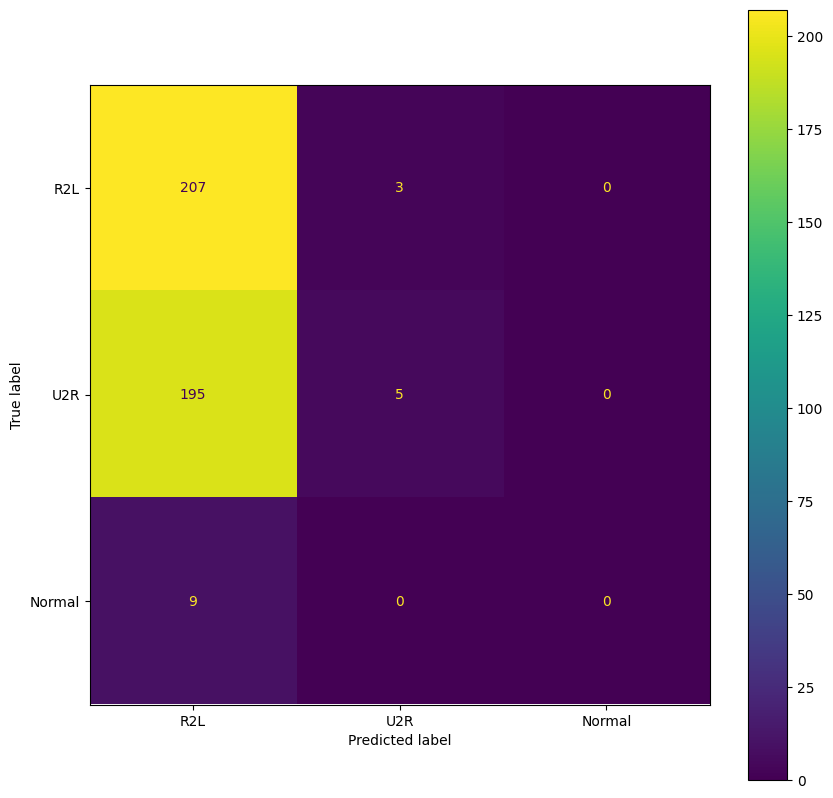

In [ ]:
mlp_modp = MLPClassifier(hidden_layer_sizes=[100,50])
mlp_modp.fit(x_train_reduced, y_train_reduced)
metrics.accuracy_score(y_test_reduced, mlp_modp.predict(x_test_reduced))
evaluate_classification(mlp_modp, "MULTI-LAYER PERCEPTRON", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)


In [ ]:
#LOGISTIC REGRESSION
lg_mod = LogisticRegression()
lg_mod.fit(x_train, y_train)
metrics.accuracy_score(y_test, lg_mod.predict(x_test))

0.5250596658711217

In [ ]:
lg_modp = LogisticRegression()
lg_modp.fit(x_train_reduced, y_train_reduced)
metrics.accuracy_score(y_test_reduced, lg_modp.predict(x_test_reduced))

0.7589498806682577

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout

In [ ]:
#Deep Neural Network
deep_modelp = Sequential([
    Dense(1024, input_dim=20, activation='relu'),
    Dropout(0.01),
    Dense(768, activation='relu'),
    Dropout(0.01),
    Dense(512, activation='relu'),
    Dropout(0.01),
    Dense(256, activation='relu'),
    Dropout(0.01),
    Dense(128, activation='relu'),
    Dropout(0.01),
    Dense(5, activation='softmax')
])

In [ ]:
deep_modelp.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
deep_modelp.fit(x_train_reduced, y_train_reduced, epochs=10, batch_size=32)


Epoch 1/10
53/53 [==============================] - 4s 41ms/step - loss: 3202.4106 - accuracy: 0.4579
Epoch 2/10
53/53 [==============================] - 2s 40ms/step - loss: 677.6096 - accuracy: 0.5146
Epoch 3/10
53/53 [==============================] - 1s 27ms/step - loss: 261.5664 - accuracy: 0.4955
Epoch 4/10
53/53 [==============================] - 1s 26ms/step - loss: 157.4879 - accuracy: 0.5290
Epoch 5/10
53/53 [==============================] - 1s 26ms/step - loss: 119.4761 - accuracy: 0.5194
Epoch 6/10
53/53 [==============================] - 1s 25ms/step - loss: 206.6191 - accuracy: 0.5003
Epoch 7/10
53/53 [==============================] - 1s 26ms/step - loss: 157.2100 - accuracy: 0.4901
Epoch 8/10
53/53 [==============================] - 1s 26ms/step - loss: 76.9362 - accuracy: 0.5003
Epoch 9/10
53/53 [==============================] - 1s 26ms/step - loss: 172.2308 - accuracy: 0.5188
Epoch 10/10
53/53 [==============================] - 2s 38ms/step - loss: 95.9085 - accurac

In [ ]:
metrics.accuracy_score(y_test, np.argmax(deep_modelp.predict(x_test), axis=1))*100


ValueError: ignored